In [64]:
import yfinance as yf

# Defina o intervalo de datas desejado
data_inicio = "2021-01-01"
data_fim = "2023-01-01"

# Baixe os preços do S&P 500 (índice SP500)
sp500 = yf.download('^GSPC', start=data_inicio, end=data_fim)

# Baixe os preços do Russell 2000 (índice de small caps)
russell2000 = yf.download('^RUT', start=data_inicio, end=data_fim)

# Exiba os primeiros registros dos DataFrames
print("Preços do S&P 500:")
print(sp500.head())

print("\nPreços do Russell 2000:")
print(russell2000.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Preços do S&P 500:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-01-04  3764.610107  3769.989990  3662.709961  3700.649902  3700.649902   
2021-01-05  3698.020020  3737.830078  3695.070068  3726.860107  3726.860107   
2021-01-06  3712.199951  3783.040039  3705.340088  3748.139893  3748.139893   
2021-01-07  3764.709961  3811.550049  3764.709961  3803.790039  3803.790039   
2021-01-08  3815.050049  3826.689941  3783.600098  3824.679932  3824.679932   

                Volume  
Date                    
2021-01-04  5015000000  
2021-01-05  4591020000  
2021-01-06  6064110000  
2021-01-07  5099160000  
2021-01-08  4773040000  

Preços do Russell 2000:
                   Open         High          Low        Close    Adj Close  \
Date      

In [8]:
import pandas_datareader.data as reader
import pandas as pd
import datetime as dt
import statsmodels.api as sm

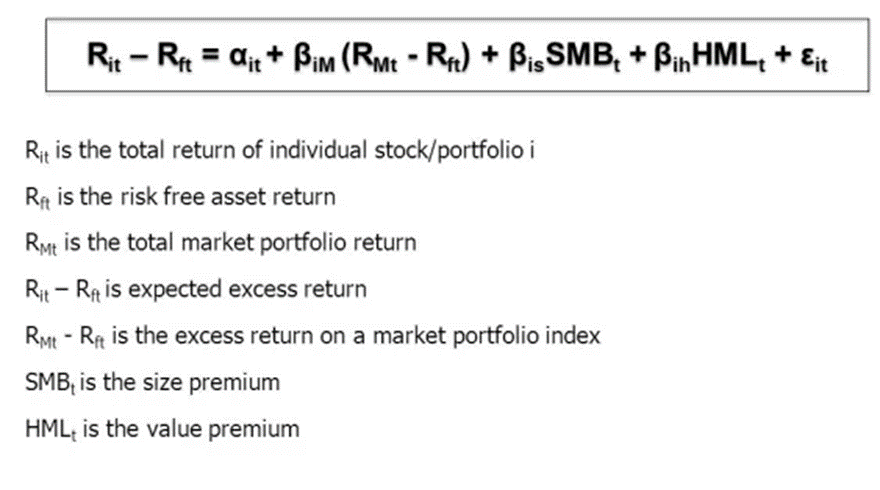

In [20]:
sp5001 = sp500['Adj Close'].pct_change()
sp5001.head()

Date
2021-01-04         NaN
2021-01-05    0.007083
2021-01-06    0.005710
2021-01-07    0.014847
2021-01-08    0.005492
Name: Adj Close, dtype: float64

In [66]:
russel = russell2000['Adj Close'].pct_change()
russel.head()

Date
2021-01-04         NaN
2021-01-05    0.017061
2021-01-06    0.039821
2021-01-07    0.018937
2021-01-08   -0.002494
Name: Adj Close, dtype: float64

In [67]:
russel = pd.DataFrame(russel)
russel.head()

,Adj Close
Date,
2021-01-04,NaN
2021-01-05,0.017061
2021-01-06,0.039821
2021-01-07,0.018937
2021-01-08,-0.002494


In [22]:
sp5001 = pd.DataFrame(sp5001)
sp5001.head()

In [68]:
russel_mensal = russel.resample('M').agg(lambda x: (x+1).prod() -1 )

In [69]:
russel_mensal.head()

,Adj Close
Date,
2021-01-31,0.065640
2021-02-28,0.061443
2021-03-31,0.008846
2021-04-30,0.020684
2021-05-31,0.001112


In [29]:
sp_mensal = sp5001.resample('M').agg(lambda x: (x+1).prod() -1 )

In [30]:
sp_mensal.head()

,Adj Close
Date,
2021-01-31,0.003672
2021-02-28,0.026091
2021-03-31,0.042439
2021-04-30,0.052425
2021-05-31,0.005486


In [43]:
df = pd.read_excel('Factors.xlsx')

In [44]:
df.head()

,Date,MKT-RF,SML,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [46]:
print(df['Date'].dtype)

int64


In [47]:
df['Date'] = df['Date'].astype(str)

# Aplique a função lambda para formatar a data
df['Date'] = df['Date'].apply(lambda x: f"{x[:4]}-{x[4:]}")

# Converta a coluna 'Date' para o formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Defina a coluna 'Date' como índice
df.set_index('Date', inplace=True)
df.head()

,MKT-RF,SML,HML,RF
Date,,,,
1926-07-01,2.96,-2.56,-2.43,0.22
1926-08-01,2.64,-1.17,3.82,0.25
1926-09-01,0.36,-1.40,0.13,0.23
1926-10-01,-3.24,-0.09,0.70,0.32
1926-11-01,2.53,-0.10,-0.51,0.31


In [48]:
df1 = df['2021-01-01':'2022-12-30']
df1.head()

,MKT-RF,SML,HML,RF
Date,,,,
2021-01-01,-0.03,7.36,3.01,0.01
2021-02-01,2.78,2.05,7.15,0.00
2021-03-01,3.08,-2.37,7.39,0.00
2021-04-01,4.93,-3.19,-0.95,0.00
2021-05-01,0.29,-0.25,7.09,0.00


In [50]:
df1.index = df1.index.strftime('%Y-%m')
sp_mensal.index = sp_mensal.index.strftime('%Y-%m')

In [70]:
russel_mensal.index = russel_mensal.index.strftime("%Y-%m")

In [53]:
df1.head()

,MKT-RF,SML,HML,RF
Date,,,,
2021-01,-0.03,7.36,3.01,0.01
2021-02,2.78,2.05,7.15,0.00
2021-03,3.08,-2.37,7.39,0.00
2021-04,4.93,-3.19,-0.95,0.00
2021-05,0.29,-0.25,7.09,0.00


In [52]:

sp_mensal.head()


,Adj Close
Date,
2021-01,0.003672
2021-02,0.026091
2021-03,0.042439
2021-04,0.052425
2021-05,0.005486


In [71]:
russel_mensal.head()

,Adj Close
Date,
2021-01,0.065640
2021-02,0.061443
2021-03,0.008846
2021-04,0.020684
2021-05,0.001112


In [54]:
df = pd.merge(sp_mensal, df1, on="Date")
df.head()

,Adj Close,MKT-RF,SML,HML,RF
Date,,,,,
2021-01,0.003672,-0.03,7.36,3.01,0.01
2021-02,0.026091,2.78,2.05,7.15,0.00
2021-03,0.042439,3.08,-2.37,7.39,0.00
2021-04,0.052425,4.93,-3.19,-0.95,0.00
2021-05,0.005486,0.29,-0.25,7.09,0.00


In [72]:
df2 = pd.merge(russel_mensal, df1, on="Date")
df2.head()

,Adj Close,MKT-RF,SML,HML,RF
Date,,,,,
2021-01,0.065640,-0.03,7.36,3.01,0.01
2021-02,0.061443,2.78,2.05,7.15,0.00
2021-03,0.008846,3.08,-2.37,7.39,0.00
2021-04,0.020684,4.93,-3.19,-0.95,0.00
2021-05,0.001112,0.29,-0.25,7.09,0.00


In [73]:
df2['RI-RF'] = df2['Adj Close'] - df2['RF']
df2.head()

,Adj Close,MKT-RF,SML,HML,RF,RI-RF
Date,,,,,,
2021-01,0.065640,-0.03,7.36,3.01,0.01,0.055640
2021-02,0.061443,2.78,2.05,7.15,0.00,0.061443
2021-03,0.008846,3.08,-2.37,7.39,0.00,0.008846
2021-04,0.020684,4.93,-3.19,-0.95,0.00,0.020684
2021-05,0.001112,0.29,-0.25,7.09,0.00,0.001112


In [56]:
df['RI-RF'] = df['Adj Close'] - df['RF']
df.head()

,Adj Close,MKT-RF,SML,HML,RF,RI-RF
Date,,,,,,
2021-01,0.003672,-0.03,7.36,3.01,0.01,-0.006328
2021-02,0.026091,2.78,2.05,7.15,0.00,0.026091
2021-03,0.042439,3.08,-2.37,7.39,0.00,0.042439
2021-04,0.052425,4.93,-3.19,-0.95,0.00,0.052425
2021-05,0.005486,0.29,-0.25,7.09,0.00,0.005486


In [58]:
df = df.rename(columns={'SML': 'SMB'})

In [74]:
df2 = df2.rename(columns={'SML': 'SMB'})

In [77]:
y1 = df2['RI-RF']
x1 = df2[['MKT-RF','SMB','HML']]
lm1 = sm.add_constant(x1)

In [78]:
y2 = df['RI-RF']
x2 = df[['MKT-RF','SMB','HML']]
lm2 = sm.add_constant(x2)

In [79]:
model = sm.OLS(y1,lm1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RI-RF   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     3.433
Date:                Sat, 16 Dec 2023   Prob (F-statistic):             0.0367
Time:                        22:29:29   Log-Likelihood:                 22.184
No. Observations:                  24   AIC:                            -36.37
Df Residuals:                      20   BIC:                            -31.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0662      0.024     -2.815      0.011      -0.115      -0.017
MKT-RF         0.0123      0.004      2.975      0.007       0.004       0.021
SMB            0.0108      0.008      1.304      0.207      -0.006       0.028
HML            0.0039      0.005      0.847      0.407      -0.006       0.014
==============================================================================
Omnibus:                       11.852   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.511
Skew:                          -1.550   Prob(JB):                      0.00522
Kurtosis:                       3.949   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model = sm.OLS(y2,lm2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RI-RF   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     2.682
Date:                Sat, 16 Dec 2023   Prob (F-statistic):             0.0744
Time:                        22:29:32   Log-Likelihood:                 21.191
No. Observations:                  24   AIC:                            -34.38
Df Residuals:                      20   BIC:                            -29.67
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0611      0.025     -2.493      0.022      -0.112      -0.010
MKT-RF         0.0122      0.004      2.836      0.010       0.003       0.021
SMB            0.0004      0.009      0.046      0.963      -0.018       0.018
HML            0.0019      0.005      0.384      0.705      -0.008       0.012
==============================================================================
Omnibus:                       11.240   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.914
Skew:                          -1.524   Prob(JB):                      0.00703
Kurtosis:                       3.788   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sp500.reset_index(inplace=True)

In [13]:
sp500.to_excel('sp500.xlsx', index=False)